In [37]:
import chess.pgn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import statsmodels.api as sm

Load and parse a `.pgn` file with all the games from FIDE World Cup 2019 using `chess.pgn`. [Documentation](https://python-chess.readthedocs.io/en/v0.28.3/pgn.html)

In [38]:
path = "./Data/wcup19.pgn"
tournament = open(path)

#first_game = chess.pgn.read_game(tournament)
#second_game = chess.pgn.read_game(tournament)

In [39]:
#print(first_game)

In [40]:
#print(second_game)

In [41]:
#outputs `Headers` object

In [42]:
#first_game.headers['ECO']

In [43]:
# first_game_Elos = [first_game.headers['WhiteElo'],first_game.headers['BlackElo']]
# first_game_Elos

In [44]:
# first_game.headers['Event']

Load all of the games into a DataFrame with relevant fields

In [45]:
params = ['WhiteElo', 'BlackElo', 'ECO', 'Opening', 'Result']

In [46]:
# def parse_pgn(file, params):
#     games_df = pd.DataFrame(columns = params)
#     for game in file:
#         cur_game = chess.pgn.read_game(file)
#         cur_row = [cur_game.headers[info] for info in params]
#         games_df.append(cur_row)
#     return games_df

In [47]:
#parse_pgn(tournament, params)

In [48]:
list_of_games = []
for game in tournament:
    cur_game = chess.pgn.read_game(tournament) # remember to reload each time
    cur_row = [cur_game.headers[info] for info in params]
    list_of_games.append(cur_row)
    


In [49]:
list_of_games

[['1954', '2811', 'B26', 'Sicilian', '0-1'],
 ['2780', '2250', 'B52', 'Sicilian', '1-0'],
 ['2284', '2774', 'A29', 'English', '0-1'],
 ['2767', '2387', 'A20', 'English opening', '1-0'],
 ['2407', '2776', 'B90', 'Sicilian', '0-1'],
 ['2758', '2431', 'A36', 'English', '1/2-1/2'],
 ['2428', '2767', 'B15', 'Caro-Kann', '0-1'],
 ['2763', '2504', 'B40', 'Sicilian', '1-0'],
 ['2503', '2759', 'D43', 'QGD semi-Slav', '0-1'],
 ['2758', '2533', 'E62', "King's Indian", '1-0'],
 ['2540', '2746', 'B12', 'Caro-Kann', '1/2-1/2'],
 ['2763', '2544', 'D25', 'QGA, 4.e3', '1-0'],
 ['2550', '2760', 'E00', 'Catalan opening', '0-1'],
 ['2745', '2540', 'E04', 'Catalan', '1/2-1/2'],
 ['2558', '2741', 'D11', 'QGD Slav', '1/2-1/2'],
 ['2739', '2558', 'E60', "King's Indian", '0-1'],
 ['2552', '2746', 'C53', 'Giuoco Piano', '0-1'],
 ['2730', '2587', 'B69', 'Sicilian', '1-0'],
 ['2581', '2729', 'A33', 'English', '1/2-1/2'],
 ['2732', '2550', 'E01', 'Catalan', '1/2-1/2'],
 ['2560', '2721', 'B90', 'Sicilian', '1/2-1/2

In [50]:
games_df = pd.DataFrame(list_of_games, columns = params)

In [51]:
games_df

,WhiteElo,BlackElo,ECO,Opening,Result
0,1954,2811,B26,Sicilian,0-1
1,2780,2250,B52,Sicilian,1-0
2,2284,2774,A29,English,0-1
3,2767,2387,A20,English opening,1-0
4,2407,2776,B90,Sicilian,0-1
...,...,...,...,...,...
421,2763,2774,D97,Gruenfeld,1/2-1/2
422,2811,2758,A19,English,1-0
423,2774,2763,C42,Petrov,1/2-1/2
424,2758,2811,C89,Ruy Lopez,1-0


Doing some EDA

In [52]:
games_df.describe()

,WhiteElo,BlackElo,ECO,Opening,Result
count,426,426,426,426,426
unique,100,100,153,53,3
top,2763,2763,C50,Ruy Lopez,1/2-1/2
freq,26,24,14,52,220


In [53]:
games_df.dtypes

WhiteElo    object
BlackElo    object
ECO         object
Opening     object
Result      object
dtype: object

In [54]:
games_df['WhiteElo'] = games_df['WhiteElo'].astype(int)

In [55]:
games_df['BlackElo'] = games_df['BlackElo'].astype(int)

In [56]:
games_df

,WhiteElo,BlackElo,ECO,Opening,Result
0,1954,2811,B26,Sicilian,0-1
1,2780,2250,B52,Sicilian,1-0
2,2284,2774,A29,English,0-1
3,2767,2387,A20,English opening,1-0
4,2407,2776,B90,Sicilian,0-1
...,...,...,...,...,...
421,2763,2774,D97,Gruenfeld,1/2-1/2
422,2811,2758,A19,English,1-0
423,2774,2763,C42,Petrov,1/2-1/2
424,2758,2811,C89,Ruy Lopez,1-0


This tournament had 426 games.

In [57]:
games_df.describe()

,WhiteElo,BlackElo
count,426.000000,426.000000
mean,2681.532864,2681.950704
std,85.130848,85.354347
min,1954.000000,1954.000000
25%,2635.000000,2635.000000
50%,2687.000000,2688.000000
75%,2746.000000,2746.000000
max,2811.000000,2811.000000


In [58]:
games_df['ECO'].nunique()

153

In [59]:
games_df['Opening'].nunique()

53

In [60]:
games_df['Result'].unique()

array(['0-1', '1-0', '1/2-1/2'], dtype=object)

In [61]:
games_df_ECOs = games_df.groupby('ECO')
games_df_ECOs.size().sort_values(ascending = False)

ECO
C50    14
C65    12
C53    12
C67    11
C42    10
       ..
C69     1
C72     1
C76     1
C80     1
A00     1
Length: 153, dtype: int64

Most popular ECO opening is C50 'Giuoco Piano'

In [62]:
# Make a DF where the indices are the Openings and columns are Instances, Frequency, White Win Ratio, Black Win Ratio, Draw Ratio, White Win Effectiveness, Black Win Effectiveness, Draw Effectiveness 
num_games = games_df.shape[0]
Instances = games_df.groupby('Opening').size().sort_values(ascending = False)
games_df_Open

NameError: name 'games_df_Openings_num' is not defined

Ruy Lopez is most popular named opening

In [70]:
# I want to find the most common opening for each of the three Results
# groupby Results, find number of times each Opening occurs, and sort in each `Result` 
Num_Openings_Results = games_df.groupby(['Result', 'Opening']).agg('size').reset_index() # How to do operation on one multi-index?
Num_Openings_Results_sorted = Num_Openings_Results.sort_values(['Result', 0], ascending = [True, False]) # ask about how to do this
pd.set_option('display.max_rows', 150)

In [71]:
Num_Openings_Results_sorted

,Result,Opening,0
6,0-1,English,8
17,0-1,QGD,7
24,0-1,Ruy Lopez,6
25,0-1,Sicilian,6
2,0-1,Caro-Kann,5
10,0-1,Giuoco Piano,4
12,0-1,King's Indian,4
16,0-1,QGA,4
7,0-1,English opening,3
9,0-1,Giuoco Pianissimo,3


(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   2.,
          2.,   2.,  10.,  32.,  63.,  91.,  72., 109.,  40.]),
 array([1954.  , 1996.85, 2039.7 , 2082.55, 2125.4 , 2168.25, 2211.1 ,
        2253.95, 2296.8 , 2339.65, 2382.5 , 2425.35, 2468.2 , 2511.05,
        2553.9 , 2596.75, 2639.6 , 2682.45, 2725.3 , 2768.15, 2811.  ]),
 <a list of 20 Patch objects>)

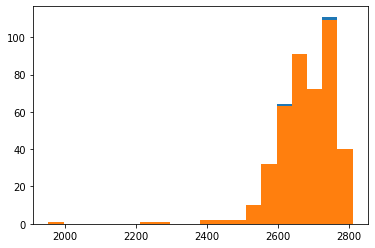

In [64]:
# histograms of ELO
plt.hist(games_df['WhiteElo'], bins = 20, label = 'WhiteElo Distribution')
plt.hist(games_df['BlackElo'], bins = 20, label = 'BlackElo Distribution')
# Use FIDE ID whenever possible because those should be unique

In [65]:
# Make pie chart of openings
plt.pie(games_df_Openings_num, labels = games_df_Openings_num.index);

NameError: name 'games_df_Openings_num' is not defined

In [ ]:
# Take Ruy Lopez and make histogram of it over White Elo
Ruy_Lopez_games = games_df_Openings.get_group('Ruy Lopez')
plt.hist(Ruy_Lopez_games['WhiteElo'])
# distribution depends on the distribution of Elo

In [ ]:
# Get Ratios for Openings
games_df_Openings_num

In [36]:
# find which openings take control/attack the center,
# this is gonna be harder to do

## Linear Regression